# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함

- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비

- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30 (80 : 20 선호)
  - 반드시 정해져 있는 것은 아니며 연구자의 임의로 조절 가능함
  - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./data/Fish.csv")

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df = df.loc[df["Species"].isin(["Bream", "Smelt"]), ["Species", "Weight", "Length2"]]

In [8]:
df.shape

(49, 3)

In [9]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [10]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


## 샘플링 편향

- 훈련 세트에 도미 데이터와 빙어 데이터가 골구루 들어가 있지 않다면 올바르게 분류할 수 없음
  - 예) 빙어 없이 모델 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할지 알 수 없음

- 데이터가 골구로 섞여있지 않으면 샘플링이 한 쪽으로 치우쳤다는 의미로 샘플링 편향(Sampling bias)라고 부름

- train_test_srlit()
  - 전달되는 리스트나 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수

  - random_state
    - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
    - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음

  - stratify
    - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df["label"], test_size=0.25)

In [18]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [19]:
y_test

6      0
28     0
24     0
16     0
15     0
8      0
156    1
13     0
19     0
25     0
151    1
32     0
30     0
Name: label, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df["label"], test_size=0.25, random_state=22, stratify=df["label"])

In [24]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [25]:
y_test

34     0
29     0
4      0
0      0
13     0
18     0
149    1
146    1
156    1
20     0
8      0
14     0
152    1
Name: label, dtype: int64

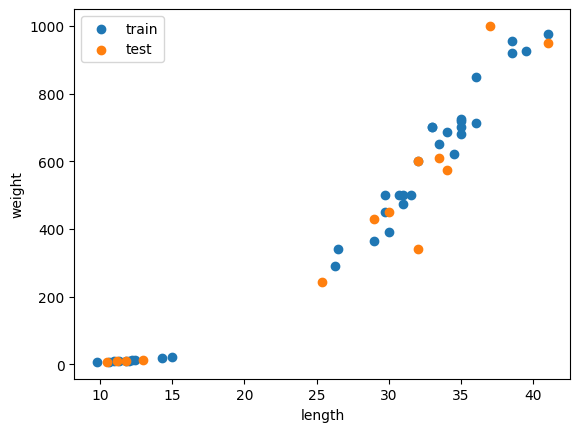

In [26]:
plt.Figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 훈련

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

# 모델 평가

In [30]:
knn.score(x_test, y_test)

1.0

# 모델 최적화

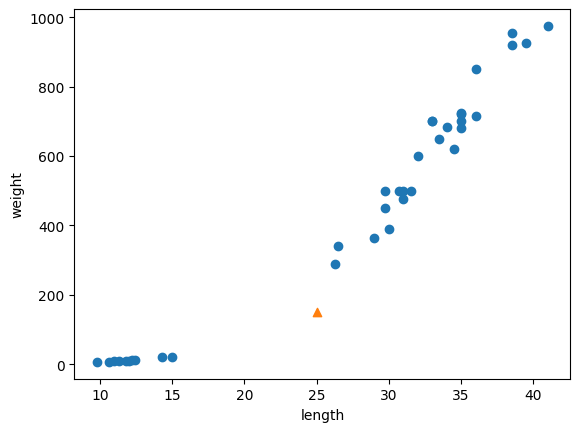

In [32]:
plt.Figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker="^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [34]:
# 길이 25, 무게 150 물고기에 대한 예측
knn.predict([[25, 150]])

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

- kneighbors() 
  - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [35]:
dist, idx = knn.kneighbors([[25, 150]])

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [36]:
dist

array([[130.48375378, 130.73859415, 137.17988191, 138.39320793,
        140.00603558]])

In [37]:
idx

array([[ 5, 18, 33, 14,  9]])

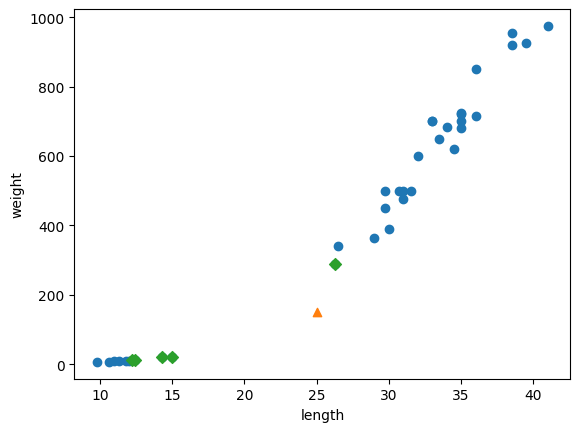

In [ ]:
plt.Figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker="D")
# 가장 가까운 데이터들을 시각화함

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [39]:
x_train.iloc[idx.flatten()]

,Length2,Weight
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
154,12.2,12.2
1,26.3,290.0


- x축은 범위가 좁고, y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨 

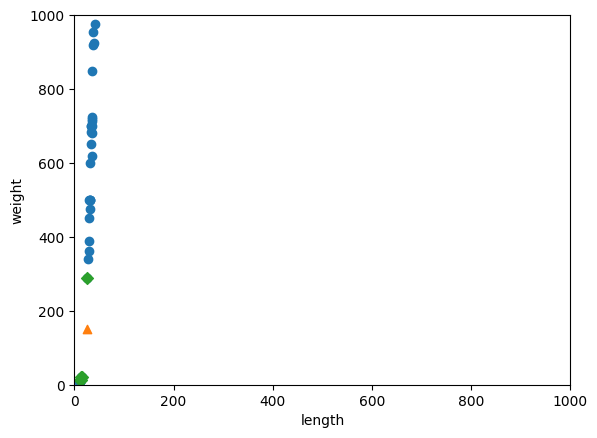

In [40]:
plt.Figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker="^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker="D")

plt.xlim((0, 1000))
plt.ylim((0, 1000))

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선이 길이는 모델이 값을 예측하는데에 거의 사용하지 않고 있음
  - 두 독립변수의 단위가 다르기 떄문에

- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음
  - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음

- 각 독립변수의 단위를 일정한 기준으로 맞춰주는 작업을 스케일링(Scaling)이라고 함 

## 스케일링

- 스탠다드 스케일링(Standard scaling)
  - 각 피처 값이 0에서 표준편차의 몇 배 만큼 떨어져있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환
    - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 계산
    - 표준 편차 : 분산의 제곱근, 데이터가 분산된 정도
  
  - 계산식
    - (특정값 - 평균) / 표준편차

In [41]:
ss = StandardScaler()

In [42]:
scaled_x_train = ss.fit_transform(x_train)

In [43]:
scaled_x_train

array([[-0.08659139, -0.37193824],
       [-1.53070331, -1.39916907],
       [ 0.6105661 ,  0.5924517 ],
       [ 0.3317031 ,  0.12581141],
       [ 0.23210918,  0.12581141],
       [-1.23192153, -1.36774862],
       [ 0.85955091,  1.21463876],
       [ 0.75995698,  0.82577185],
       [ 0.85955091,  0.79155156],
       [-0.10651017, -0.527485  ],
       [-1.63029724, -1.39948016],
       [ 0.56076913,  0.74799847],
       [-1.60041906, -1.4025911 ],
       [ 0.16239343, -0.30038673],
       [-1.51078453, -1.39170283],
       [ 0.71016002,  0.49912364],
       [ 0.41137824,  0.12581141],
       [ 0.26198736, -0.21639147],
       [-1.30163728, -1.36837081],
       [ 0.46117521,  0.43690494],
       [ 1.10853573,  1.43240423],
       [ 0.36158128,  0.12581141],
       [ 0.75995698,  0.81021717],
       [ 0.23210918, -0.02973536],
       [ 1.20812965,  1.44795891],
       [-1.5506221 , -1.39854688],
       [ 0.75995698,  0.68577976],
       [ 0.66036306,  0.70133444],
       [ 0.75995698,

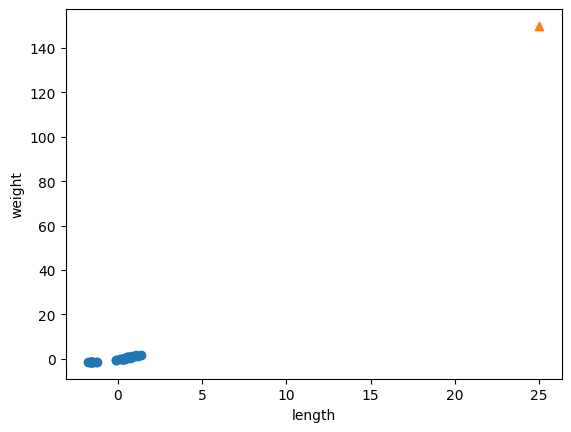

In [45]:
# 스케일링된 데이터 시각화
plt.Figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker="^") # => 스케일링 필요

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

- 값의 스케일이 달라졌기 떄문에 테스트 데이터도 스케일링 필요

In [46]:
scaled_data = ss.transform([[25, 150]])

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


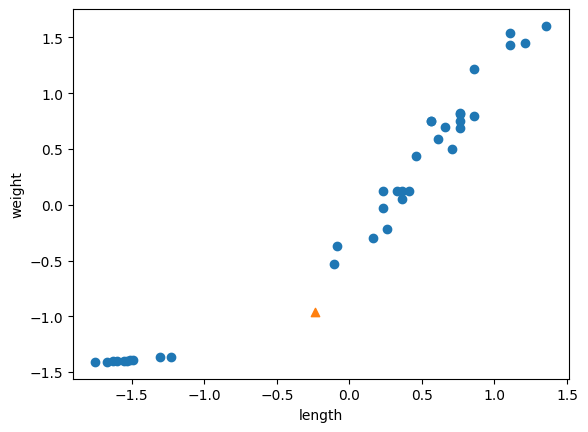

In [47]:
# 스케일링된 데이터 시각화
plt.Figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker="^")

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [48]:
scaled_x_test = ss.transform(x_test)

In [49]:
# 스케일링된 데이터로 다시 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [51]:
knn.score(scaled_x_test, y_test)

1.0

In [52]:
# 문제의 데이터 예측
knn.predict(scaled_data)

array([0])

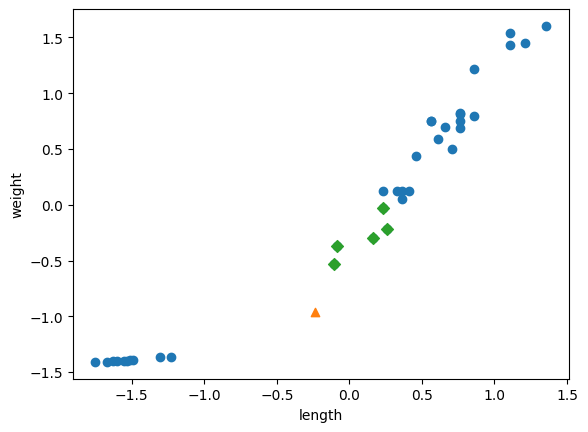

In [53]:
# 시각화
dist, idx = knn.kneighbors(scaled_data)

plt.Figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker="^")
plt.scatter(scaled_x_train[idx.flatten(),0], scaled_x_train[idx.flatten(), 1], marker="D")

plt.xlabel("length")
plt.ylabel("weight")

plt.show()